# 로지스틱 회귀 - 이항분류

## #01. 패키지 준비하기

In [1]:
import sys
sys.path.append('../../')
import helper

from pandas import read_excel, DataFrame, read_csv
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

## #02. 데이터셋 준비하기

방사선학 석사과정 대학원생 모집을 하였다. 이 때 지원한 방사선사의 대학원 합격 여부에 따른 주요 요인이 무엇인지 분석하라.

단, 독립변수는 정규분포를 따른다고 가정한다.

| 변수 | 구분 | 설명 |
|---|---|---
| 합격여부 | 범주형 | 1=합격, 0=불합격 |
| 필기점수 | 연속형 | 800점 만점 |
| 학부성적 | 연속형 | 4.0 만점 |
| 병원경력 | 범주형 | 1: 10년이상, 2: 2~5년, 3: 1~5년, 4: 1년 미만 |

In [44]:
origin = read_excel("C:/Users/User/Desktop/2023년_8월말_인구현황_최종수11정.xlsx")
origin

,행정구별_공영주차장_주차면수,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,전체인구,세대당_인구
0,374,16,5141,21246,43324,2.02
1,0,1,437,1677,2628,1.66
2,0,0,529,2125,3078,1.73
3,0,1,1345,4515,5966,1.79
4,0,2,1338,5383,8794,1.78
5,0,0,1176,5051,7184,1.61
6,0,0,1088,4598,7261,1.84
7,0,0,1182,3795,5864,1.78
8,0,0,477,2210,3450,1.69
9,0,0,504,1802,2426,1.90


## #03. 데이터 전처리

### 결측치 확인

In [55]:
origin['대도시지역']= np.where(origin['전체인구']>20000, 1,0)
origin

,행정구별_공영주차장_주차면수,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,전체인구,세대당_인구,대도시지역
0,374,16,5141,21246,43324,2.02,1
1,0,1,437,1677,2628,1.66,0
2,0,0,529,2125,3078,1.73,0
3,0,1,1345,4515,5966,1.79,0
4,0,2,1338,5383,8794,1.78,0
5,0,0,1176,5051,7184,1.61,0
6,0,0,1088,4598,7261,1.84,0
7,0,0,1182,3795,5864,1.78,0
8,0,0,477,2210,3450,1.69,0
9,0,0,504,1802,2426,1.90,0


### 명목형에 대한 데이터 타입 설정

In [56]:
origin['대도시지역'] = origin['대도시지역'].astype('category')
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   행정구별_공영주차장_주차면수  24 non-null     int64   
 1   행정구별_공원수         24 non-null     int64   
 2   행정구별_사업체수        24 non-null     int64   
 3   행정구별_자동차_등록현황    24 non-null     int64   
 4   전체인구             24 non-null     int64   
 5   세대당_인구           24 non-null     float64 
 6   대도시지역            24 non-null     category
dtypes: category(1), float64(1), int64(5)
memory usage: 1.4 KB


## #04. 탐색적 데이터 분석

### 기본통계 확인

In [6]:
df1.describe()

,행정구별_공영주차장_주차면수,행정구별_공원수,행정구별_사업체수,행정구별_자동차_등록현황,전체인구,세대당_인구
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,67.708333,2.916667,1187.083333,8214.125000,16312.958333,2.267083
std,149.113170,5.081224,1183.636876,5248.553244,11613.511245,0.467821
min,0.000000,0.000000,0.000000,1677.000000,2426.000000,1.610000
25%,0.000000,0.000000,497.250000,4450.500000,6879.500000,1.787500
50%,0.000000,0.000000,1064.000000,6299.000000,12406.000000,2.285000
75%,3.250000,2.750000,1360.750000,11473.500000,25870.750000,2.662500
max,572.000000,16.000000,5141.000000,21246.000000,43324.000000,2.970000


### 상자그림 확인

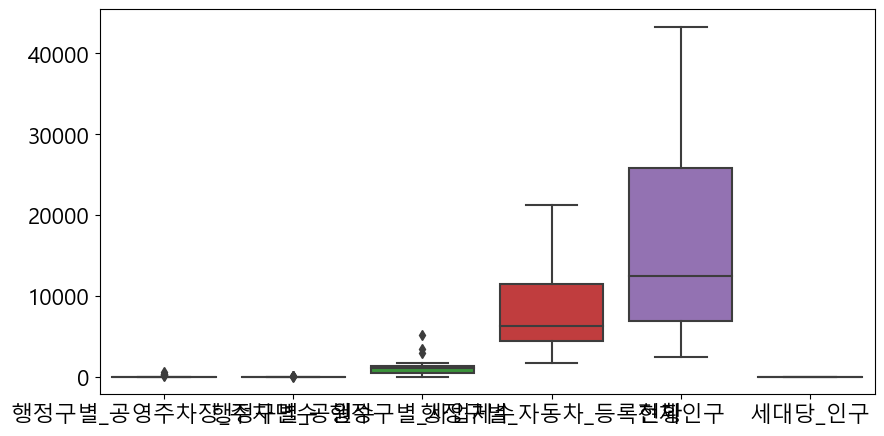

In [7]:
plt.figure(figsize=(10, 5))
sb.boxplot(data=df1)
plt.show()
plt.close()

> 데이터 단위가 크게 다르므로 표준화가 필요해 보임

## #05. 데이터셋 분할하기

### 랜덤시드 고정

In [57]:
np.random.seed(777)

### 훈련 데이터(독립변수)와 레이블(종속변수) 구분하기

In [58]:
colList = list(origin.columns)
colList

['행정구별_공영주차장_주차면수',
 '행정구별_공원수',
 '행정구별_사업체수',
 '행정구별_자동차_등록현황',
 '전체인구',
 '세대당_인구',
 '대도시지역']

In [59]:
x = origin[['행정구별_공영주차장_주차면수','행정구별_공원수','행정구별_사업체수','행정구별_자동차_등록현황','전체인구',
 '세대당_인구']]
y = origin[['대도시지역']]
x.shape, y.shape

((24, 6), (24, 1))

### 데이터 표준화

In [60]:
x_scaller = StandardScaler()
x_scale = x_scaller.fit_transform(x)
print(x_scale.shape)
x_scale

(24, 6)


array([[ 2.09826764,  2.63021797,  3.41232767,  2.53634894,  2.37585259,
        -0.53951756],
       [-0.4638396 , -0.38531856, -0.64734043, -1.27229812, -1.20370936,
        -1.32559375],
       [-0.4638396 , -0.58635433, -0.56794216, -1.18510542, -1.164128  ,
        -1.1727456 ],
       [-0.4638396 , -0.38531856,  0.13628598, -0.71994796, -0.91010365,
        -1.0417329 ],
       [-0.4638396 , -0.18428279,  0.13024481, -0.55101211, -0.66135682,
        -1.06356835],
       [-0.4638396 , -0.58635433, -0.00956519, -0.61562812, -0.80297012,
        -1.43477099],
       [-0.4638396 , -0.58635433, -0.08551136, -0.70379395, -0.79619731,
        -0.93255565],
       [-0.4638396 , -0.58635433, -0.00438704, -0.86007908, -0.91907543,
        -1.06356835],
       [-0.4638396 , -0.58635433, -0.61281944, -1.16856216, -1.13140742,
        -1.2600874 ],
       [-0.4638396 , -0.58635433, -0.58951778, -1.2479698 , -1.22147699,
        -0.80154296],
       [ 1.38581001,  1.22296759,  1.46016584,  0.

### 표준화 전 후 상자그림 비교

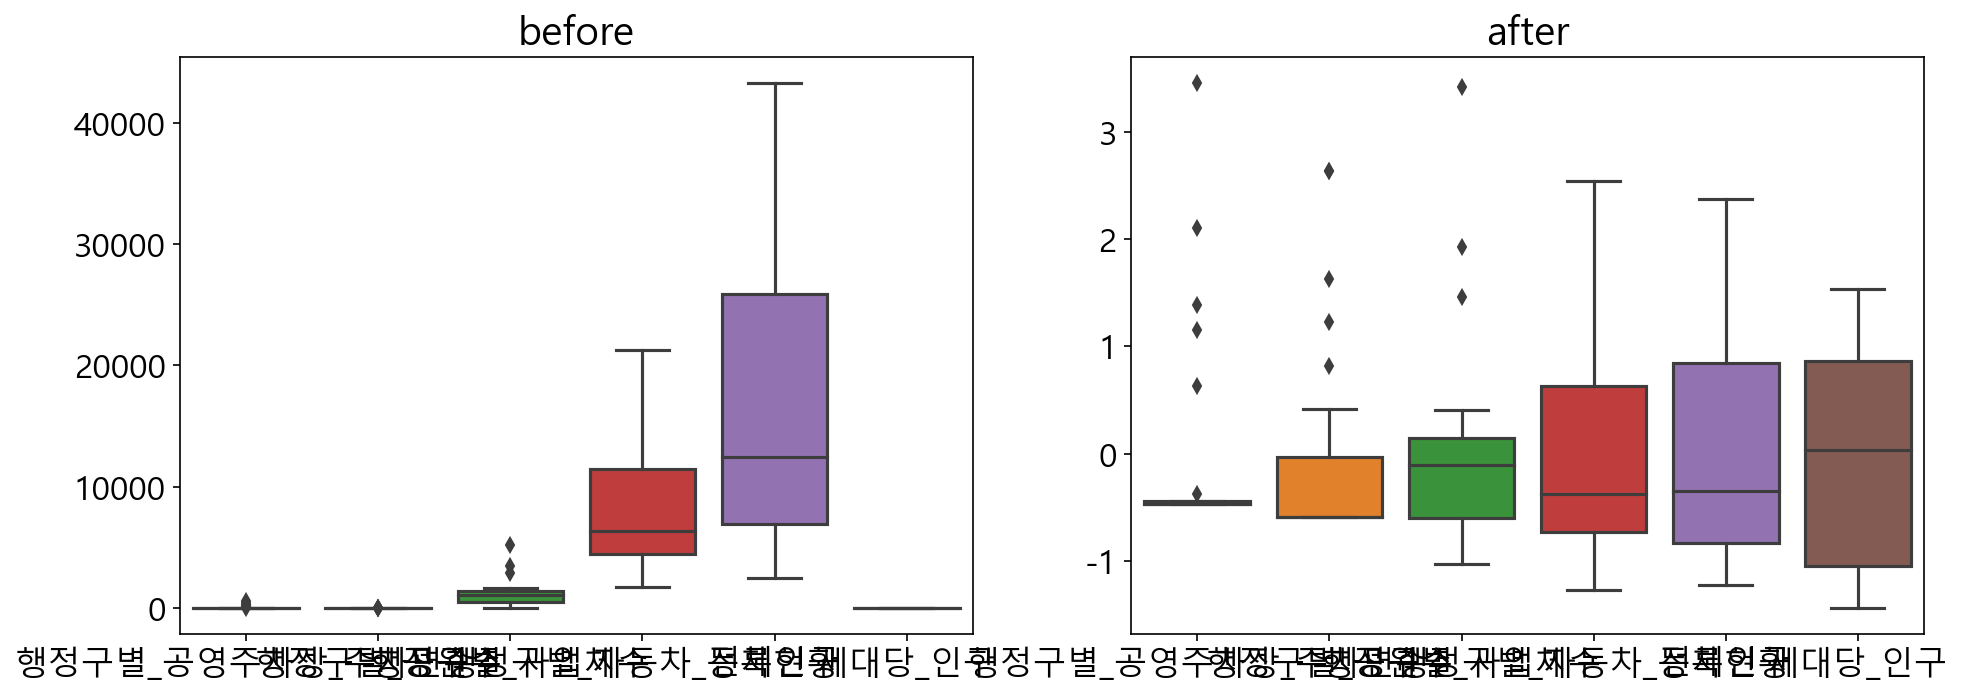

In [61]:
# 임시로 독립변수와 종속변수를 하나의 DataFrame으로 병합
x_scale_df = DataFrame(x_scale, columns=['행정구별_공영주차장_주차면수','행정구별_공원수','행정구별_사업체수','행정구별_자동차_등록현황','전체인구',
 '세대당_인구'])

fig, ax = plt.subplots(1, 2, figsize=(15, 5), dpi=150)
sb.boxplot(data=origin, ax=ax[0])
sb.boxplot(data=x_scale_df, ax=ax[1])
ax[0].set_title('before')
ax[1].set_title('after')
plt.show()
plt.close()

### 훈련 데이터와 검증 데이터로 분할

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.3, random_state=777)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16, 6), (8, 6), (16, 1), (8, 1))

## #06. 모델 개발

### 모델 정의

[relu,] sigmoid	rmsporp	binary_crossentropy	acc

In [63]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(6, )))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                224       
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 257 (1.00 KB)
Trainable params: 257 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 학습하기

In [64]:
result = model.fit(x_train, y_train, epochs = 500, validation_data = (x_test, y_test), callbacks = [
    EarlyStopping(monitor = 'val_loss', patience=5, verbose = 1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.0001, verbose=1)
])

Epoch 1/500


1/1 [==============================] - 1s 620ms/step - loss: 0.6617 - acc: 0.8125 - val_loss: 0.6612 - val_acc: 0.7500 - lr: 0.0010
Epoch 2/500
1/1 [==============================] - 0s 26ms/step - loss: 0.6379 - acc: 0.8125 - val_loss: 0.6527 - val_acc: 0.7500 - lr: 0.0010
Epoch 3/500
1/1 [==============================] - 0s 30ms/step - loss: 0.6213 - acc: 0.8125 - val_loss: 0.6458 - val_acc: 0.7500 - lr: 0.0010
Epoch 4/500
1/1 [==============================] - 0s 33ms/step - loss: 0.6078 - acc: 0.8125 - val_loss: 0.6399 - val_acc: 0.7500 - lr: 0.0010
Epoch 5/500
1/1 [==============================] - 0s 33ms/step - loss: 0.5962 - acc: 0.8125 - val_loss: 0.6347 - val_acc: 0.7500 - lr: 0.0010
Epoch 6/500
1/1 [==============================] - 0s 31ms/step - loss: 0.5858 - acc: 0.8125 - val_loss: 0.6299 - val_acc: 0.7500 - lr: 0.0010
Epoch 7/500
1/1 [==============================] - 0s 32ms/step - loss: 0.5761 - acc: 0.8125 - val_loss: 0.6255 - val_acc: 0.7500 - lr: 0.0010
Epoch 8/50

## #07. 학습 결과 평가

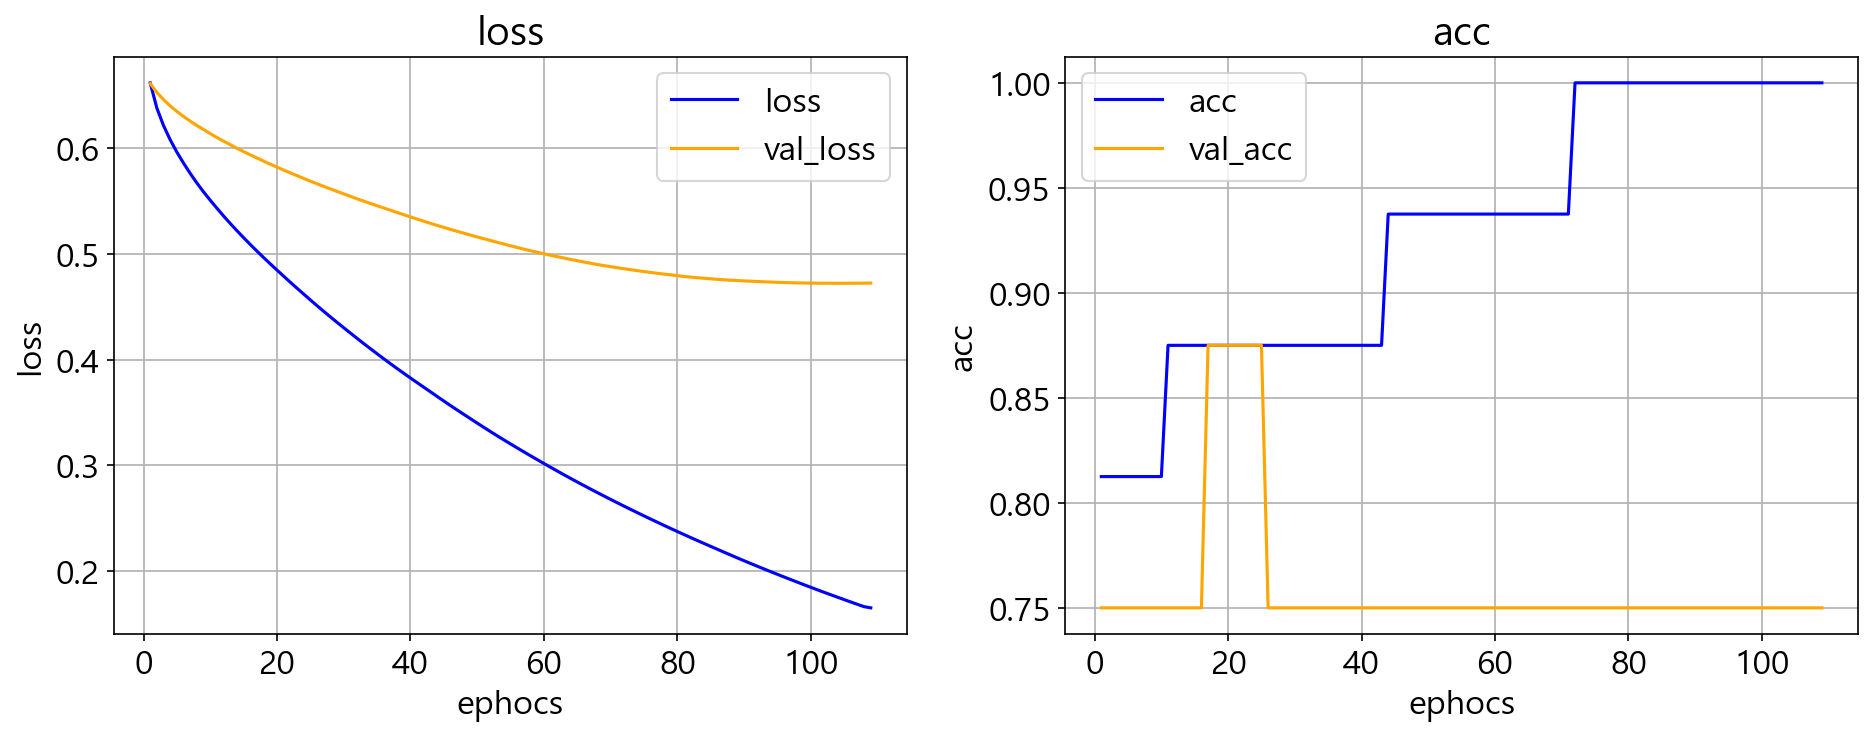

1/1 [==============================] - 0s 21ms/step - loss: 0.1642 - acc: 1.0000
최종 훈련 손실률: 0.164224, 최종 훈련 정확도: 1.000000
1/1 [==============================] - 0s 27ms/step - loss: 0.4724 - acc: 0.7500
최종 검증 손실률: 0.472392, 최종 검증 정확도: 0.750000


In [65]:
helper.tf_result_plot(result)

evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률: %f, 최종 훈련 정확도: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 검증 손실률: %f, 최종 검증 정확도: %f" % (evaluate2[0], evaluate2[1]))

## #08. 학습 결과 적용

### 훈련 데이터에 대한 예측 결과 산정

In [66]:
train_pred = model.predict(x_train)
data_count, case_count = train_pred.shape
print("%d개의 훈련 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
print(train_pred)

1/1 [==============================] - 0s 65ms/step
16개의 훈련 데이터가 1개의 경우의 수를 갖는다.
[[0.08290421]
 [0.13388266]
 [0.40305734]
 [0.03181682]
 [0.86904776]
 [0.96284366]
 [0.8044384 ]
 [0.03813834]
 [0.9671515 ]
 [0.20339487]
 [0.76133955]
 [0.8279887 ]
 [0.83018446]
 [0.09793057]
 [0.2716613 ]
 [0.08234607]]


### 검증 데이터에 대한 예측 결과 산정

In [67]:
test_pred = model.predict(x_test)
data_count, case_count = test_pred.shape
print("%d개의 검증 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
#print(test_pred)

1/1 [==============================] - 0s 20ms/step
8개의 검증 데이터가 1개의 경우의 수를 갖는다.


### 결과 데이터 셋 구성

In [68]:
kdf = DataFrame({
    '결과값': y_train['대도시지역'].values,
    '예측치' : np.round(train_pred.flatten()),
    '합격확률(%)': np.round(train_pred.flatten() * 100, 1)
})

kdf

,결과값,예측치,합격확률(%)
0,0,0.0,8.300000
1,0,0.0,13.400000
2,0,0.0,40.299999
3,0,0.0,3.200000
4,1,1.0,86.900002
5,1,1.0,96.300003
6,1,1.0,80.400002
7,0,0.0,3.800000
8,1,1.0,96.699997
9,0,0.0,20.299999


#### 혼동행렬

In [69]:
cm = confusion_matrix(kdf['결과값'], kdf['예측치'])
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)
cmdf1 = DataFrame([[tn, fn], [fp, tp]], index=['True', 'False'], columns=['Negative', 'Positive'])
cmdf1

9 0 0 7


,Negative,Positive
True,9,0
False,0,7


| | Negative|Positive|
|--|--|--|
| True | TN | FP |
| False | FN | TP |

#### 각 항목의 의미

| 구분 | 설명 |
|--|--|
| TN(True Negative, Negative Negative) | 실제는 Negative인데, Negative로 예측함. |
| FP(False Positive, Negative Positive) | 실제는 Negative인데, Positive로 예측함. (Type1 Error) |
| FN(False Negative, Positive Negative) | 실제는 Positive인데, Negative로 예측함. (Type2 Error) |
| TP(True Positive, Positive Positive) | 실제는 Positive인데, Positive로 예측함. |

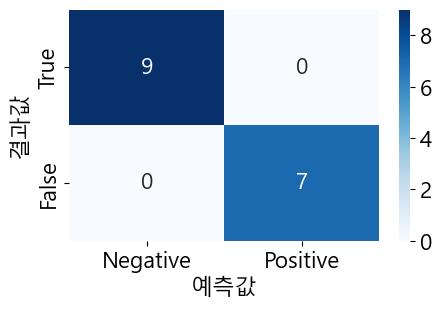

In [70]:
plt.figure(figsize=(5,3))
# 오차 행렬을 히트맵 그래프로 표현
# -> annot : 그래프의 각 칸에 수치값 출력
# -> fmt : 수치값 출력 format (여기서는 10진수)
# -> cmap : 색상맵 (<https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html>)
sb.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['True', 'False'])
plt.xlabel('예측값')
plt.ylabel('결과값')
plt.show()

### 평가지표

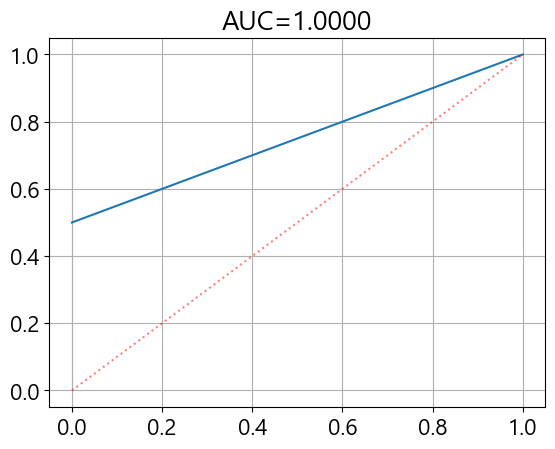

In [71]:
ras = roc_auc_score(kdf['결과값'], kdf['예측치'])

# 위양성율, 재현율, 임계값(사용안함)
fpr, tpr, thresholds = roc_curve(kdf['결과값'], kdf['예측치'])

plt.figure()
sb.lineplot(x=fpr, y=tpr)
sb.lineplot(x=[0,1], y=[0,1], color='red', linestyle=':', alpha=0.5)
plt.title('AUC={:.4f}'.format(ras))
plt.grid()
plt.show()
plt.close()

In [74]:
# 정확도
acc = accuracy_score(kdf['결과값'], kdf['예측치'])

# 정밀도
pre = precision_score(kdf['결과값'], kdf['예측치'])

# 재현율
recall = recall_score(kdf['결과값'], kdf['예측치'])

# F1 score
f1 = f1_score(kdf['결과값'], kdf['예측치'])

# 위양성율
fallout = fp / (fp + tn)

# 특이성
spe = 1 - fallout

result_df = DataFrame({'정확도(Accuracy)':[acc], '정밀도(Precision)':[pre], '재현율(Recall, TPR)':[recall], '위양성율(Fallout, FPR)': [fallout], '특이성(Specificity, TNR)':[spe], 'RAS': [ras], 'f1_score':[f1]})

helper.prettyPrint(result_df.T)

+--------------------------+-----+
|                          |   0 |
|--------------------------+-----|
| 정확도(Accuracy)         |   1 |
| 정밀도(Precision)        |   1 |
| 재현율(Recall, TPR)      |   1 |
| 위양성율(Fallout, FPR)   |   0 |
| 특이성(Specificity, TNR) |   1 |
| RAS                      |   1 |
| f1_score                 |   1 |
+--------------------------+-----+


### 분류 보고서

- precision : 정밀도 (분류기가 참으로 분류한 항목 중에서 실제 데이터가 참인 비율)
- recall : 재현율 (실제 참 중에서 분류기가 참으로 분류한 비율)
- f1-score : 2*(Recall * Precision) / (Recall + Precision)
    - Precision과 Recall의 조화평균
    - 주로 분류 클래스 간 데이터가 심각한 불균형을 이루는 경우에 사용
    - 정확도의 경우, 클래스가 데이터 분류가 균일하지 못하면 머신의 성능을 제대로 나타내줄 수 없기 때문에 F1을 사용한다.
- support : 전체 데이터 수

In [75]:
report = classification_report(kdf['결과값'], kdf['예측치'])
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         7

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

